In [149]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [150]:
df=pd.read_csv('/home/chinghia/AI_Engineer/IMDB_Dataset/IMDB Dataset.csv')

In [151]:
df.shape

(50000, 2)

In [152]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [153]:
notnull=df.isnull().count()
notnull

review       50000
sentiment    50000
dtype: int64

In [154]:
X=df.drop('sentiment',axis=1)
y=df['sentiment']

In [155]:
print(f'X{X.head(10)}{X.shape} \n\ny\n{y.head(10)}{y.shape}')

X                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...
5  Probably my all-time favorite movie, a story o...
6  I sure would like to see a resurrection of a u...
7  This show was an amazing, fresh & innovative i...
8  Encouraged by the positive comments about this...
9  If you like original gut wrenching laughter yo...(50000, 1) 

y
0    positive
1    positive
2    positive
3    negative
4    positive
5    positive
6    positive
7    negative
8    negative
9    positive
Name: sentiment, dtype: object(50000,)


In [156]:
def clean_df(text):
    text=text.lower()
    text=re.sub(r'<.*?>','',text)
    text=re.sub(r'[^a-zA-Z\s]','',text)
    return text

In [157]:
X['review']=X['review'].apply(clean_df)
# X['review'] = X['review'].str.lower()
# X['review'] = X['review'].str.replace(r'<.*?>', '', regex=True)
# X['review'] = X['review'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
# khong can def chay nhanh hon

In [158]:
X.head(5)

,review
0,one of the other reviewers has mentioned that ...
1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...
3,basically theres a family where a little boy j...
4,petter matteis love in the time of money is a ...


In [159]:
tf=TfidfVectorizer(max_features=5000,stop_words='english')
X=tf.fit_transform(X['review'])

In [160]:
X.shape

(50000, 5000)

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
print(f'X {X_test.shape} \n\n y\n{y_test.shape}')

X (10000, 5000) 

 y
(10000,)


In [163]:
model_svm=LinearSVC(C=1,class_weight='balanced',random_state=42)
model_svm.fit(X_train,y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,42


In [164]:
model_svm.score(X_test,y_test)

0.8731

In [165]:
y_pred=model_svm.predict(X_test)

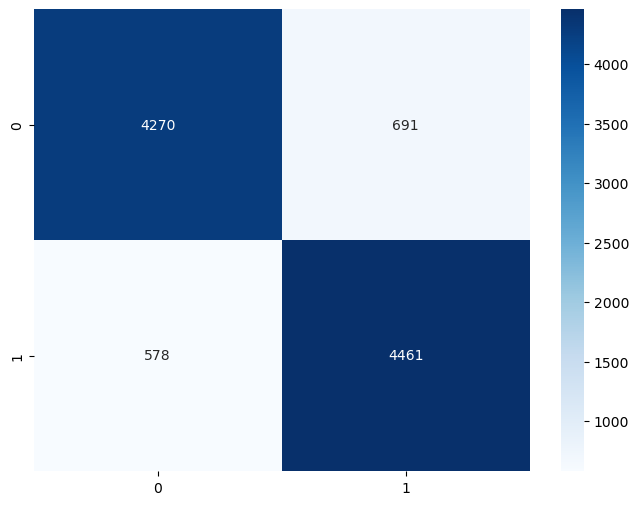

In [166]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d')
plt.show()